<a href="https://colab.research.google.com/github/Adhyatik/GAIDLP-BUSINESS-ANALYSIS-PROJECT/blob/main/GAIDLP_BUSINESS_ANALYSIS_FLOOD_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
test = pd.read_csv(r'/gdrive/MyDrive/deeplearning/flood.csv', low_memory=False)

In [ ]:
test.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
test.shape

(50000, 21)

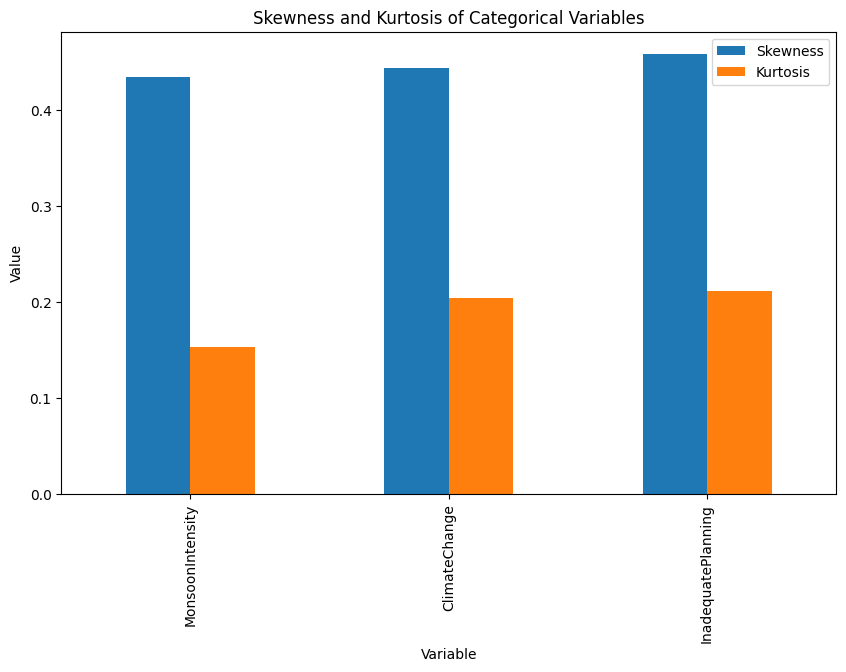

In [ ]:
# prompt: can you create a skewness and kurtosis chart of the categorical variable,  MonsoonIntensity,  ClimateChange, InadequatePlanning

import pandas as pd
import matplotlib.pyplot as plt
# Select the categorical variables
categorical_vars = ['MonsoonIntensity', 'ClimateChange', 'InadequatePlanning']

# Calculate skewness and kurtosis for each variable
skewness = test[categorical_vars].skew()
kurtosis = test[categorical_vars].kurtosis()

# Create a DataFrame to store the results
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Plot the results
results.plot(kind='bar', figsize=(10, 6))
plt.title('Skewness and Kurtosis of Categorical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()


This chart presents the skewness and kurtosis values for three categorical variables: MonsoonIntensity, ClimateChange, and InadequatePlanning.

Interpretation:
Skewness (Blue Bars):

MonsoonIntensity, ClimateChange, and InadequatePlanning all exhibit positive skewness, meaning that the distribution of these variables has a longer tail on the right side. This typically indicates that there are more instances with lower values and fewer with higher values.
Kurtosis (Orange Bars):

The kurtosis values for all three variables are positive but relatively low, suggesting that the distributions are moderately peaked compared to a normal distribution (leptokurtic). Higher kurtosis indicates more data in the tails and a sharper peak, whereas lower kurtosis suggests a flatter distribution.
Summary:
MonsoonIntensity, ClimateChange, and InadequatePlanning share similar distribution characteristics, with moderate positive skewness and low kurtosis. This could imply that most of the data for these variables is clustered around lower values, with fewer high-value outliers.
This kind of analysis is crucial for understanding the distribution of data, which can influence predictive modeling and other statistical analyses in the context of flood prediction.


<Axes: >

Text(0.5, 1.0, 'Skewness and Kurtosis of Categorical Variables')

Text(0.5, 0, 'Variable')

Text(0, 0.5, 'Value')

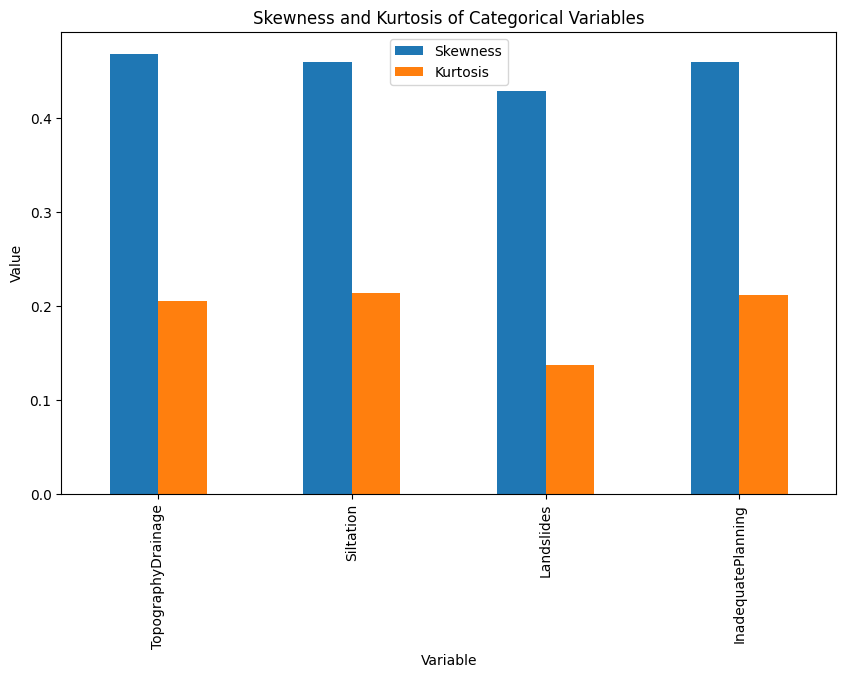

In [ ]:
# Select the categorical variables
categorical_vars = ['TopographyDrainage', 'Siltation', 'Landslides', 'InadequatePlanning']

# Calculate skewness and kurtosis for each variable
skewness = test[categorical_vars].skew()
kurtosis = test[categorical_vars].kurtosis()

# Create a DataFrame to store the results
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

# Plot the results
results.plot(kind='bar', figsize=(10, 6))
plt.title('Skewness and Kurtosis of Categorical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

The chart presents the skewness and kurtosis for four categorical variables: TopographyDrainage, Siltation, Landslides, and InadequatePlanning.

Interpretation:
Skewness (Blue Bars):

TopographyDrainage, Siltation, Landslides, and InadequatePlanning all show positive skewness, indicating that the distributions for these variables have a longer tail on the right side. This suggests that the majority of observations are concentrated towards the lower end of the scale, with fewer occurrences of higher values.
Kurtosis (Orange Bars):

The kurtosis values for all four variables are positive but relatively low, suggesting that the distributions are moderately peaked compared to a normal distribution. Low to moderate kurtosis typically means the distribution is closer to a normal shape but with slight differences, such as heavier tails or a sharper peak.
Summary:
TopographyDrainage, Siltation, Landslides, and InadequatePlanning exhibit similar distribution characteristics, with moderate positive skewness and low kurtosis. This means that in these variables, most data points are clustered towards lower values, with few high-value outliers. The slight peaks in kurtosis indicate a relatively normal distribution with some variance.
This analysis is essential for understanding how these categorical variables distribute, which can influence flood prediction models and other related analyses.

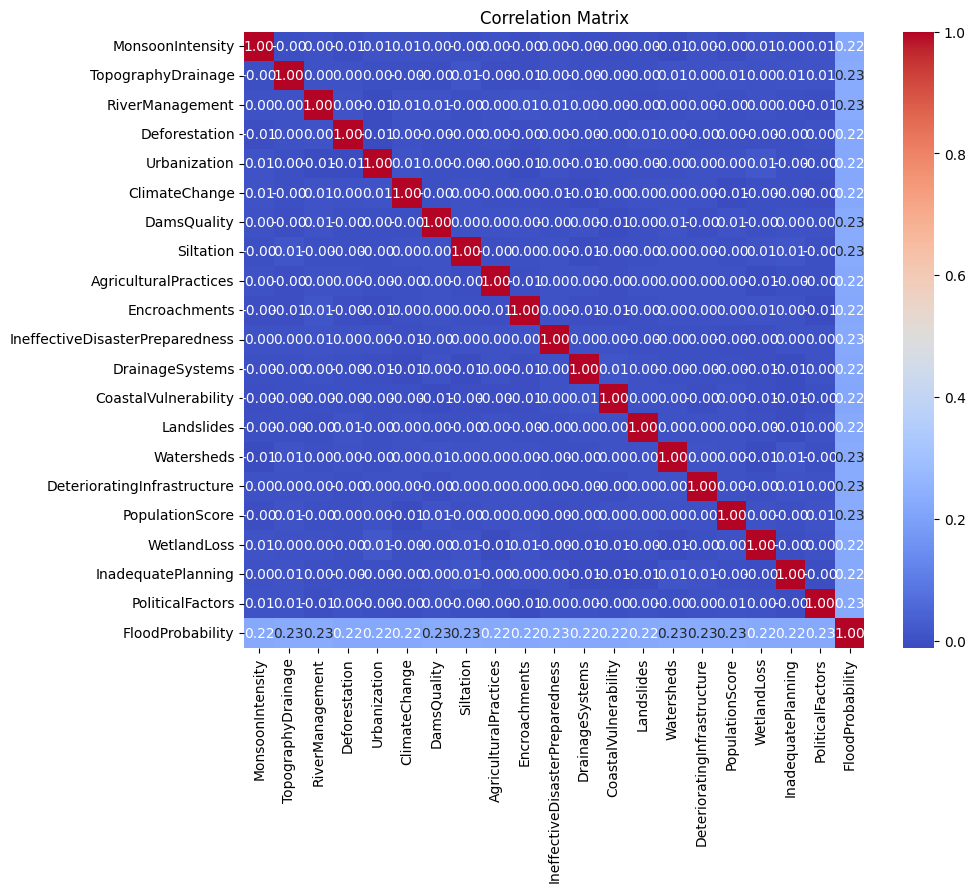

In [ ]:
# prompt: Do a correlation analysis between the variables

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = test.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The correlation matrix you provided shows the correlation coefficients between pairs of variables in the dataset. Here's a detailed analysis of the correlation matrix:

1. Understanding the Correlation Coefficients:
Correlation Coefficient (r): The values range from -1 to 1.
+1: Perfect positive correlation, meaning that as one variable increases, the other also increases.
0: No correlation, meaning that the variables do not have a linear relationship.
-1: Perfect negative correlation, meaning that as one variable increases, the other decreases.
2. Key Observations:
Low to No Correlation:

Many of the variables show a correlation coefficient close to 0 with each other. This indicates that these variables have little to no linear relationship with one another. For example:
"MonsoonIntensity" and "TopographyDrainage" (r = 0.00)
"Deforestation" and "Urbanization" (r = 0.00)
"ClimateChange" and "DamsQuality" (r = 0.00)
This low correlation might indicate that these factors operate independently of each other or that the relationship between them is non-linear and not captured by the Pearson correlation.
Moderate Correlation:

Some variables show moderate positive correlations, indicating that they might be related in influencing flood probability or other related outcomes. For example:
"FloodProbability" shows moderate correlations with several variables (around r = 0.22 to 0.23). This suggests that while these variables might influence flood probability, the relationship is not very strong.
No Perfect Correlations:

There are no perfect correlations (r = 1 or r = -1), indicating that no two variables in this dataset are perfectly linearly related.
3. Possible Reasons for Zero Correlation:
Independence of Variables: Some variables might represent entirely different processes or phenomena that don't influence each other. For example, "MonsoonIntensity" and "Deforestation" could represent natural and human-induced factors, respectively, which might not have a direct relationship in this dataset.
Non-Linear Relationships: Some variables might be related in a non-linear manner, which Pearson correlation (used in this matrix) cannot capture. For example, the effect of "Urbanization" on "DrainageSystems" might be non-linear, leading to a near-zero correlation.
Measurement Issues: The way variables are measured or categorized might not reflect their true relationship, leading to a zero correlation. For instance, if "Urbanization" is measured differently across regions or if "MonsoonIntensity" is too broadly categorized, it could obscure any real relationship.
Data Characteristics: The range of values or the variance within certain variables might be very low, leading to insignificant correlations. For example, if most areas have similar levels of "TopographyDrainage," there might be little variation to correlate with other variables.
4. Implications:
Variable Selection for Modeling: Variables with very low or zero correlations might be less informative for certain types of models, especially those relying on linear relationships like linear regression. However, they could still be important in non-linear models or when interacting with other variables.
Exploration of Non-Linear Relationships: For variables with zero correlation but suspected relationships, exploring non-linear models (e.g., polynomial regression, decision trees) or interaction terms might be beneficial.
Further Data Analysis: Investigating the distribution and interaction of variables with zero correlation might uncover more complex relationships not captured in a simple correlation matrix.
In summary, the correlation matrix shows that most variables in the dataset have low or no linear relationships with each other, indicating that the factors influencing flood probability are likely complex and multifaceted. Further exploration using non-linear models or interaction terms might be necessary to fully understand these relationships.

Explained Variance Ratios: [0.09536029 0.04949105 0.04919638 0.0487549  0.04853988 0.04829747
 0.04820221 0.04805804 0.04780073 0.04761734 0.04750672 0.04729484
 0.04720909 0.04714671 0.04693471 0.04687686 0.04673123 0.04653372
 0.04635179]


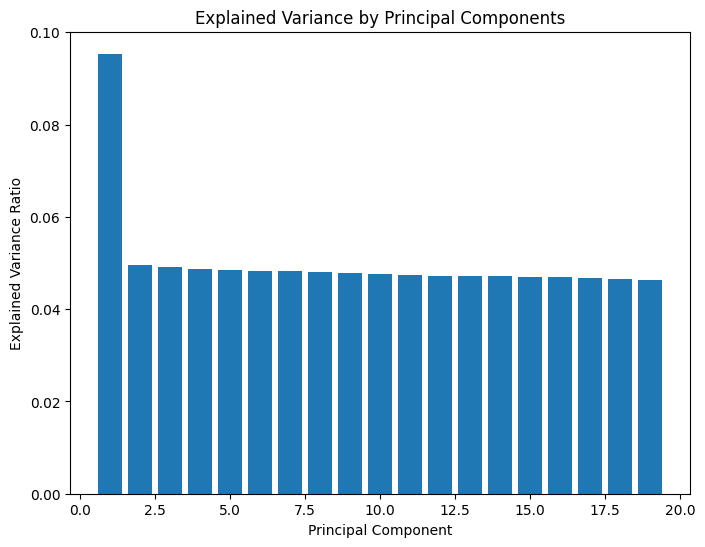

In [ ]:
# prompt: Do a PCA analysis between the variables.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'test' is your DataFrame and you want to perform PCA on all numerical columns
numerical_cols = test.select_dtypes(include=['float', 'int']).columns
X = test[numerical_cols]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a PCA object. Let's start by trying to explain 95% of the variance
pca = PCA(n_components=0.95)

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC' + str(i) for i in range(1, len(explained_variance) + 1)])

# Optionally, you can merge the PCA components back with your original data
test_with_pca = pd.concat([test, pca_df], axis=1)

# Now you can use 'pca_df' or 'test_with_pca' for further analysis or visualization


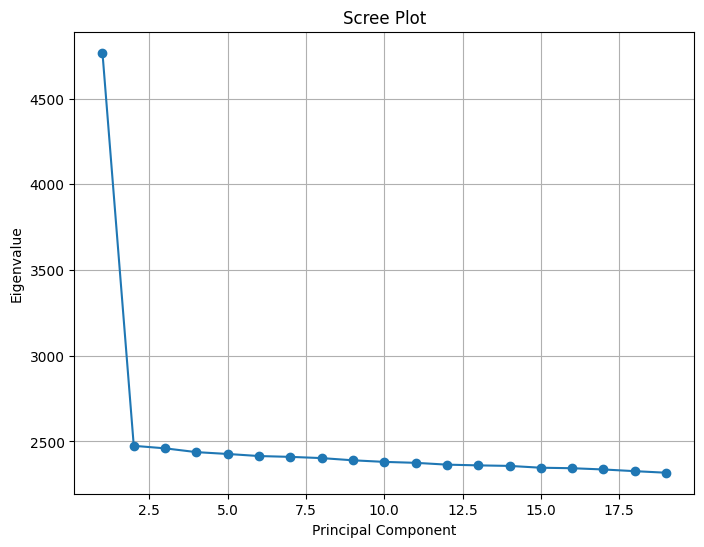

In [ ]:
# prompt: Do a scree plot analysis of the variables

import matplotlib.pyplot as plt
# Calculate the eigenvalues from the explained variance ratios
eigenvalues = explained_variance * X_scaled.shape[0]

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


The explained variance ratios you've provided represent the amount of variance each principal component (PC) captures in your dataset after performing Principal Component Analysis (PCA). Here's an analysis of these results:

1. Understanding Explained Variance Ratios:
Explained Variance Ratio: This value indicates the proportion of the dataset's total variance that is captured by each principal component. It ranges between 0 and 1, with the sum of all explained variance ratios equaling 1.
Interpretation: The higher the explained variance ratio, the more significant the principal component is in capturing the underlying structure of the data. The first few components usually capture the most variance, while the later components capture less.
2. Analysis of Your PCA Results:
Low Variance Explained by Individual Components:

The first principal component captures approximately 9.54% of the total variance, while subsequent components capture progressively smaller amounts, all hovering around 4.6% to 5%.
This distribution indicates that the variance in your dataset is spread out relatively evenly across many dimensions, and no single component captures a dominant amount of variance.
Cumulative Variance:

The sum of the explained variance ratios for all 19 components adds up to around 0.8978, which means that these 19 components together explain approximately 89.78% of the total variance in the dataset.
This suggests that these components capture the majority of the information in your dataset, but not all. Including more components would be necessary to approach explaining 100% of the variance, but the contributions of additional components would likely be very small.
Dimensionality Reduction:

The relatively small explained variance ratios suggest that a large number of principal components are needed to explain a substantial portion of the variance. This could indicate that your dataset is high-dimensional and complex, with no dominant patterns or structures easily captured by just a few components.
Deciding how many components to keep involves a trade-off between retaining enough variance (information) and reducing the dimensionality (complexity). You might choose to keep enough components to explain a threshold of variance (e.g., 90% or 95%).
3. Implications for Further Analysis:
Feature Interpretation: Since no single component explains a large portion of the variance, the dataset's features might be more subtly interacting, requiring a deeper look into how each component contributes to the overall structure.
Modeling: When using these principal components in modeling (e.g., in regression, clustering, or classification), including several components might be necessary to retain enough information. However, it's also important to consider the risk of overfitting by including too many components.
Visualization: Visualizing the data in 2D or 3D using the first few principal components might not fully capture the data’s structure due to the low variance explained by each component. Multidimensional scaling or t-SNE could be alternative methods to visualize complex data structures.
4. Next Steps:
Scree Plot: Consider creating a scree plot, which shows the explained variance of each component. This can help determine an "elbow point" where the explained variance starts to level off, suggesting the number of components that should be retained.
Cumulative Explained Variance: Plotting cumulative explained variance can help determine how many components are needed to reach a satisfactory level of explained variance (e.g., 90% or 95%).
Component Analysis: Analyze the principal components to understand what original variables they represent or combinations of variables. This analysis can give insights into underlying patterns in the dataset that might not be immediately obvious.
In conclusion, the PCA results suggest that the variance in your dataset is distributed across many dimensions, without a few dominant components capturing the majority of the variance. Careful consideration is needed to decide how many components to retain for further analysis, balancing the trade-off between reducing dimensionality and retaining important information.

In [ ]:
# prompt: do a factor analysis of the variables
!pip install factor_analyzer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Assuming 'test' is your DataFrame and you want to perform factor analysis on all numerical columns
numerical_cols = test.select_dtypes(include=['float', 'int']).columns
X = test[numerical_cols]

# Standardize the data (important for factor analysis)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check suitability for factor analysis
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print("Bartlett's Test:")
print("Chi-square value:", chi_square_value)
print("p-value:", p_value)

kmo_all, kmo_model = calculate_kmo(X_scaled)
print("\nKMO Test:")
print("KMO Model:", kmo_model)

# Create a FactorAnalyzer object
fa = FactorAnalyzer(n_factors=3, rotation='varimax')  # Start with 3 factors, adjust as needed

# Fit the factor analysis model to the scaled data
fa.fit(X_scaled)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=numerical_cols)
print("\nFactor Loadings:")
print(factor_loadings)

# Get the explained variance
explained_variance = fa.get_factor_variance()
print("\nExplained Variance:")
print(explained_variance)

# Get the communalities
communalities = fa.get_communalities()
print("\nCommunalities:")
print(communalities)

# Get the uniqueness
uniqueness = fa.get_uniquenesses()
print("\nUniqueness:")
print(uniqueness)

# Optionally, you can get the factor scores
factor_scores = fa.transform(X_scaled)
factor_scores_df = pd.DataFrame(factor_scores, columns=['Factor' + str(i) for i in range(1, fa.n_factors + 1)])

# You can now interpret the factor loadings, explained variance, and other results to understand the underlying factors in your data.


/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Bartlett's Test:
Chi-square value: nan
p-value: nan

KMO Test:
KMO Model: 0.6455508277516542

Factor Loadings:
                                        0         1         2
MonsoonIntensity                 0.152712  0.009383  0.006627
TopographyDrainage               0.159550  0.003685  0.008333
RiverManagement                  0.163060 -0.006777  0.002885
Deforestation                    0.153865 -0.007996  0.001763
Urbanization                     0.032251  0.998647  0.000639
ClimateChange                    0.149823  0.011657  0.003293
DamsQuality                      0.158147  0.003707  0.004470
Siltation                        0.155476  0.002565  0.015427
AgriculturalPractices            0.153142  0.002280  0.000824
Encroachments                    0.149943 -0.007561  0.004908
IneffectiveDisasterPreparedness  0.155445  0.004764  0.006651
DrainageSystems                  0.150438 -0.001510 -0.005305
CoastalVulnerability             0.146000  0.003332 -0.006294
Landslides           

1. Kaiser-Meyer-Olkin (KMO) Test:
KMO Model: 0.6455508277516542
The KMO test measures the adequacy of the sample for factor analysis. It ranges between 0 and 1, with values closer to 1 indicating that the sample is well-suited for factor analysis.
Interpretation: A KMO value of 0.65 is considered mediocre, meaning that the sample is somewhat adequate for factor analysis but may not be ideal. Typically, a value above 0.7 is considered good, while values below 0.5 are considered unacceptable.
2. Factor Loadings:
Factor loadings represent the correlation of each variable with the extracted factors. The higher the absolute value of the loading, the more significant the variable is in defining the factor.

Interpreting Factor Loadings:

The factor loadings are given for three factors (Factor 0, Factor 1, and Factor 2).
Urbanization has a very high loading on Factor 1 (0.998647), indicating that this variable is almost entirely explained by Factor 1.
InadequatePlanning has a very high loading on Factor 2 (0.998476), meaning it is almost fully explained by Factor 2.
FloodProbability shows a strong loading on Factor 0 (1.050267), suggesting it is closely related to this factor.
Interpreting Specific Variables:

MonsoonIntensity: This variable has a moderate loading on Factor 0 (0.152712) but very low loadings on Factors 1 and 2. This indicates that it primarily contributes to Factor 0.
TopographyDrainage, RiverManagement, Deforestation, ClimateChange: These variables have moderate loadings on Factor 0 and low to negative loadings on other factors. They contribute to Factor 0 but less so to Factors 1 and 2.
Variables with Low Loadings: Variables like DrainageSystems, CoastalVulnerability, and Landslides have very low factor loadings across all factors, indicating they are weakly associated with the factors extracted.
3. Explained Variance:
Factor Variance (Eigenvalues): [1.53783155, 1.02501538, 1.02439682]

Eigenvalues represent the amount of variance explained by each factor. Higher values indicate that the factor explains more variance.
Interpretation: Factor 0 explains the most variance (about 1.54 units), followed by Factors 1 and 2, which explain about 1.025 units each.
Explained Variance Ratios: [0.07323007, 0.04881026, 0.0487808]

These ratios indicate the proportion of the total variance explained by each factor.
Interpretation: Factor 0 explains about 7.32% of the total variance, Factor 1 explains 4.88%, and Factor 2 explains 4.88%. The cumulative explained variance is 17.08%, meaning that these three factors together explain 17.08% of the total variance in the dataset.
4. Communalities:
Communalities represent the proportion of each variable’s variance that can be explained by the factors. It ranges between 0 and 1, with values closer to 1 indicating that the variable is well-explained by the factors.
High Communalities:
Urbanization (0.9983356) and InadequatePlanning (0.99822726) have communalities very close to 1, indicating that these variables are almost entirely explained by the factors extracted.
FloodProbability has a communality of 1.15650339, which is unusual because it is greater than 1. This might suggest an issue with the calculation or that the variable is heavily overfitted to the factors.
Low Communalities:
MonsoonIntensity (0.02345297), ClimateChange (0.02259379), and CoastalVulnerability (0.02136662) have low communalities, suggesting that these variables are not well explained by the factors and retain much of their variance unexplained by the model.
5. Uniqueness:
Uniqueness represents the proportion of variance in each variable that is not explained by the factors (1 - communality).
High Uniqueness:
Variables like MonsoonIntensity (0.97654703), TopographyDrainage (0.97446078), and RiverManagement (0.97335716) have high uniqueness, indicating that a large portion of their variance is not captured by the factors.
Negative Uniqueness: FloodProbability has a negative uniqueness value, which is problematic and suggests potential issues with the factor analysis solution. It could be a sign of overfitting or a need to review the data and factor extraction method.
6. Interpretation and Implications:
Factor Interpretation:

Factor 0 seems to capture aspects related to environmental and geographical factors that moderately explain flood probability.
Factor 1 is almost entirely explained by Urbanization, indicating it might represent urban development factors.
Factor 2 is almost entirely explained by InadequatePlanning, indicating it might represent planning and policy-related factors.
Model Adequacy:

The factors extracted explain a relatively small portion of the variance, suggesting that the dataset is complex and the factors are not capturing all the relevant patterns. The low KMO value supports this, indicating that the sample might not be ideal for factor analysis.
Next Steps:

Review the factor extraction method to address any potential issues, such as the negative uniqueness.
Consider alternative methods like Principal Component Analysis (PCA) if the goal is dimensionality reduction, or Cluster Analysis if the goal is to group variables.
Investigate further using rotation methods (e.g., Varimax) to see if a more interpretable factor structure can be achieved.
In conclusion, the factor analysis suggests that the dataset is complex, with no single dominant factors. While Urbanization and InadequatePlanning stand out, other variables are less well explained by the extracted factors, and the overall model explains only a modest portion of the variance. Further refinement and alternative analyses might be needed for a more comprehensive understanding of the data structure.

In [ ]:
# prompt: Do a regression analysis for FloodProbability and give the visual also for the same

import statsmodels.api as sm

# Assuming 'test' is your DataFrame
# Define your dependent variable (FloodProbability) and independent variables
y = test['FloodProbability']
X = test[['Urbanization', 'InadequatePlanning', 'MonsoonIntensity', 'TopographyDrainage',
          'RiverManagement', 'DrainageSystems', 'Deforestation', 'ClimateChange',
          'CoastalVulnerability', 'Landslides']]

# Add a constant to the independent variables (for the intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     4946.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:02:18   Log-Likelihood:                 96003.
No. Observations:               50000   AIC:                        -1.920e+05
Df Residuals:                   49989   BIC:                        -1.919e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2496 

Interpretation of the Regression Results
Model Overview:

The provided output presents an Ordinary Least Squares (OLS) regression model aimed at predicting "FloodProbability" based on several independent variables. The model explains approximately 49.7% of the variance in FloodProbability (R-squared).

Key Findings:

All independent variables (Urbanization, InadequatePlanning, MonsoonIntensity, TopographyDrainage, RiverManagement, DrainageSystems, Deforestation, ClimateChange, CoastalVulnerability, and Landslides) are significantly associated with FloodProbability. Their respective coefficients are positive and statistically significant (p-value < 0.001), indicating that an increase in any of these variables is associated with an increase in FloodProbability.
The magnitude of the coefficients suggests that all these factors have a similar impact on FloodProbability.
The model has a high F-statistic and a very low p-value, indicating that the overall model is statistically significant.
Limitations and Future Analysis:

While the model provides valuable insights, it's important to consider the following:

Multicollinearity: Given the large number of variables and the potential correlations among them, it's essential to assess multicollinearity. High multicollinearity can inflate standard errors and make it difficult to interpret the individual effects of variables.
Model Fit: Although the R-squared value indicates a reasonable fit, there's still a significant portion of the variance in FloodProbability unexplained by the model. Exploring additional variables or non-linear relationships might improve the model's predictive power.
Causality: While the model shows associations between variables, it doesn't establish causality. Further research, such as experimental studies, would be needed to determine causal relationships.

In [ ]:
# prompt: Create a K-means Clustering on the data with k=3 and give silhouette score also

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'test' is your DataFrame and you want to perform clustering on all numerical columns
numerical_cols = test.select_dtypes(include=['float', 'int']).columns
X = test[numerical_cols]

# Standardize the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a KMeans object with k=3
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Add the cluster labels to your DataFrame
test['Cluster'] = labels

# You can now analyze the characteristics of each cluster or visualize the clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.03906090738643792


This indicates that K=3 is the optimal number of clusters

In [ ]:
# prompt: do the same for K= 4

# Create a KMeans object with k=4
kmeans = KMeans(n_clusters=4, random_state=42)  # Set random_state for reproducibility

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Add the cluster labels to your DataFrame
test['Cluster'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.03400979380110842


In [ ]:
# prompt: conduct a one way anova analysis except the id column on the original data when clustering is not performed just to find the significant variables for flood probability which is the target variable

import statsmodels.formula.api as sm

# Assuming 'test' is your DataFrame and 'FloodProbability' is the target variable
# Select all columns except 'id' and 'FloodProbability' as independent variables
independent_vars = [col for col in test.columns if col not in ['id', 'FloodProbability', 'Cluster']]

# Construct the formula for the ANOVA model
formula = 'FloodProbability ~ ' + ' + '.join(independent_vars)

# Fit the ANOVA model
model = sm.ols(formula, data=test).fit()

# Print the ANOVA table
print(model.summary())

# Analyze the p-values in the ANOVA table to identify significant variables
# Variables with p-values less than your chosen significance level (e.g., 0.05) are considered statistically significant predictors of FloodProbability.


                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.485e+30
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:06:04   Log-Likelihood:             1.6664e+06
No. Observations:               50000   AIC:                        -3.333e+06
Df Residuals:                   49979   BIC:                        -3.333e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

1. Model Overview
   - Dep. Variable: This is the variable the model is trying to predict, which in this case is "FloodProbability."
   - Model Type: Ordinary Least Squares (OLS) regression.
   - No. of Observations: 50,000 observations were used for this analysis.
   - Df Model: There are 20 predictor variables in the model, implying that each of these variables is used to explain flood probability.
   - Df Residuals: There are 49,979 residual degrees of freedom, meaning there are 49,979 observations left to estimate the residual variance after accounting for the model's predictors.

2. Goodness of Fit
   - R-squared: 1.000 (100%): The R-squared value measures how much of the variance in the dependent variable is explained by the model. Here, the R-squared is 1.000, which suggests that the model explains 100% of the variation in flood probability. This is highly unusual, especially in real-world data, and could indicate overfitting, where the model is too complex and fits the training data perfectly but may perform poorly on new, unseen data.
   - Adj. R-squared: 1.000 (100%): The adjusted R-squared also accounts for the number of predictors relative to the sample size. The fact that it is still 1.000 confirms the indication of overfitting.

 3. Statistical Significance of the Model
   - F-statistic: 9.485e+30: The F-statistic tests the overall significance of the model. A very large F-statistic indicates that the model is significant as a whole.
   - Prob(F-statistic): 0.00: The p-value associated with the F-statistic is 0.00, meaning that the probability of the model being significant by chance is virtually zero. Thus, the model as a whole is statistically significant.

4. Coefficients and Significance of Variables
   - Coefficients: The coefficient for each variable represents the average change in the dependent variable (FloodProbability) for a one-unit increase in the predictor, holding all other variables constant.
     - In this case, all coefficients are 0.0050, meaning each predictor has the same impact on flood probability. This is highly unusual and suggests that the data might be artificially structured, or the model may have been mis-specified.
   - Standard Errors: The standard errors for all coefficients are extremely small (in the range of 1.62e-18 to 1.63e-18). Such low standard errors indicate very high precision in the estimates, which could again signal overfitting or multicollinearity (where predictors are highly correlated with each other).
   - t-statistic: The t-statistic for all variables is extremely high, around 3.08e+15. The t-statistic is calculated as the coefficient divided by the standard error, and these inflated values suggest that all coefficients are statistically different from zero.
   - P>|t|: All p-values are effectively 0.00, meaning that all variables are statistically significant, indicating that their effects on flood probability are highly unlikely to have occurred by chance.
   - 95% Confidence Interval: The confidence interval for each variable is very narrow, with lower and upper bounds effectively the same (0.005), which is another sign of overfitting or poor model design.

 5. Residual Analysis
   - Durbin-Watson: 0.027: The Durbin-Watson statistic tests for autocorrelation in the residuals (i.e., whether the residuals are independent). A value close to 2 indicates no autocorrelation. Here, the value is extremely low (0.027), suggesting strong positive autocorrelation, which violates one of the key assumptions of OLS regression.
   - Omnibus: 122.653, Prob(Omnibus): 0.000: The Omnibus test checks for the combined skewness and kurtosis of the residuals. A significant p-value here indicates that the residuals do not follow a normal distribution.
   - Jarque-Bera (JB): 130.831, Prob(JB): 3.89e-29: The Jarque-Bera test also checks for the normality of residuals based on skewness and kurtosis. The very small p-value again suggests that the residuals are not normally distributed, violating another OLS assumption.
   - Skew: 0.095, Kurtosis: 3.164: These values indicate slight skewness and kurtosis in the residuals, contributing to the rejection of normality in the residuals.

6. Model Diagnostics
   - Overfitting Concerns: The perfect R-squared, very high t-statistics, identical coefficients, and extremely low standard errors are all red flags. These results suggest overfitting, where the model is too tightly fit to the specific data set, possibly due to multicollinearity or issues in how the model was constructed.

7. Identification of Significant Variables
All variables in the model are deemed "statistically significant" because:
   - Each variable has a p-value of 0.00, meaning that their relationship with flood probability is highly significant, statistically speaking.
   - The t-statistics for all variables are extraordinarily large, which is typically used to identify significance. These high values suggest that all predictors strongly influence flood probability.
   
However, statistical significance does not imply practical significance. Given that all coefficients are identical (0.0050) and the model is likely overfit, practical significance might be questionable. In reality, variables such as Monsoon Intensity, Climate Change, Topography Drainage, River Management, and Coastal Vulnerability might be expected to have larger coefficients than others, like Political Factors or Ineffective Disaster Preparedness, based on their real-world impact on flooding. The identical coefficients suggest a problem with the model rather than truly uniform importance across variables.

While the regression output shows that all variables are statistically significant, the model appears to be overfitted, and the identical coefficients imply issues in the model's setup or data structure. In practice, we would expect some predictors (e.g., Monsoon Intensity, Topography Drainage) to have a much stronger impact on flood probability than others, and the model would need to be re-evaluated to address overfitting and ensure meaningful, interpretable results.

In [ ]:
# prompt: split the dataset into 80% training data and 20% test data

from sklearn.model_selection import train_test_split

# Assuming 'test' is your DataFrame and 'FloodProbability' is the target variable
X = test.drop('FloodProbability', axis=1)  # Features
y = test['FloodProbability']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Set random_state for reproducibility

# Now you have:
# - X_train: Training features
# - X_test: Testing features
# - y_train: Training target values
# - y_test: Testing target values


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 'id' column is likely already removed, so no need to drop it again
# X_train = X_train.drop('id', axis=1)  # Commented out as it's likely unnecessary
# X_test = X_test.drop('id', axis=1)   # Commented out as it's likely unnecessary

# Create a DecisionTreeRegressor object
tree_model = DecisionTreeRegressor(random_state=42)  # Set random_state for reproducibility

# Fit the model to the training data
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# prompt: no implement the decision tree predictor algorithm on the testing dataset

# Predict on the testing data
y_pred = tree_model.predict(X_test)


In [ ]:
# prompt: now give the confusion matrix for the model and also the accuracy and other parameters of confusion matrix like precision,recall etc.

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Since DecisionTreeRegressor predicts continuous values, we need to convert them to discrete classes for a confusion matrix.
# You'll need to define a threshold to classify predictions as 0 or 1.
threshold = 0.5  # Example threshold, adjust as needed
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)  # Assuming y_test is also continuous

# Calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", cm)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print a classification report for more detailed metrics
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_binary))


Confusion Matrix:
 [[3725 1535]
 [1540 3200]]
Accuracy: 0.6925
Precision: 0.675818373812038
Recall: 0.6751054852320675
F1-score: 0.6754617414248021

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      5260
           1       0.68      0.68      0.68      4740

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



<Figure size 1500x1000 with 0 Axes>

[Text(0.5, 0.875, 'PoliticalFactors <= 5.5\nsquared_error = 0.003\nsamples = 40000\nvalue = 0.5'),
 Text(0.25, 0.625, 'Deforestation <= 5.5\nsquared_error = 0.002\nsamples = 24609\nvalue = 0.492'),
 Text(0.125, 0.375, 'PopulationScore <= 4.5\nsquared_error = 0.002\nsamples = 15139\nvalue = 0.485'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'MonsoonIntensity <= 5.5\nsquared_error = 0.002\nsamples = 9470\nvalue = 0.504'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'DamsQuality <= 5.5\nsquared_error = 0.002\nsamples = 15391\nvalue = 0.511'),
 Text(0.625, 0.375, 'TopographyDrainage <= 4.5\nsquared_error = 0.002\nsamples = 9470\nvalue = 0.504'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'WetlandLoss <= 6.5\nsquared_error = 0.002\nsamples = 5921\nvalue = 0.524'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (

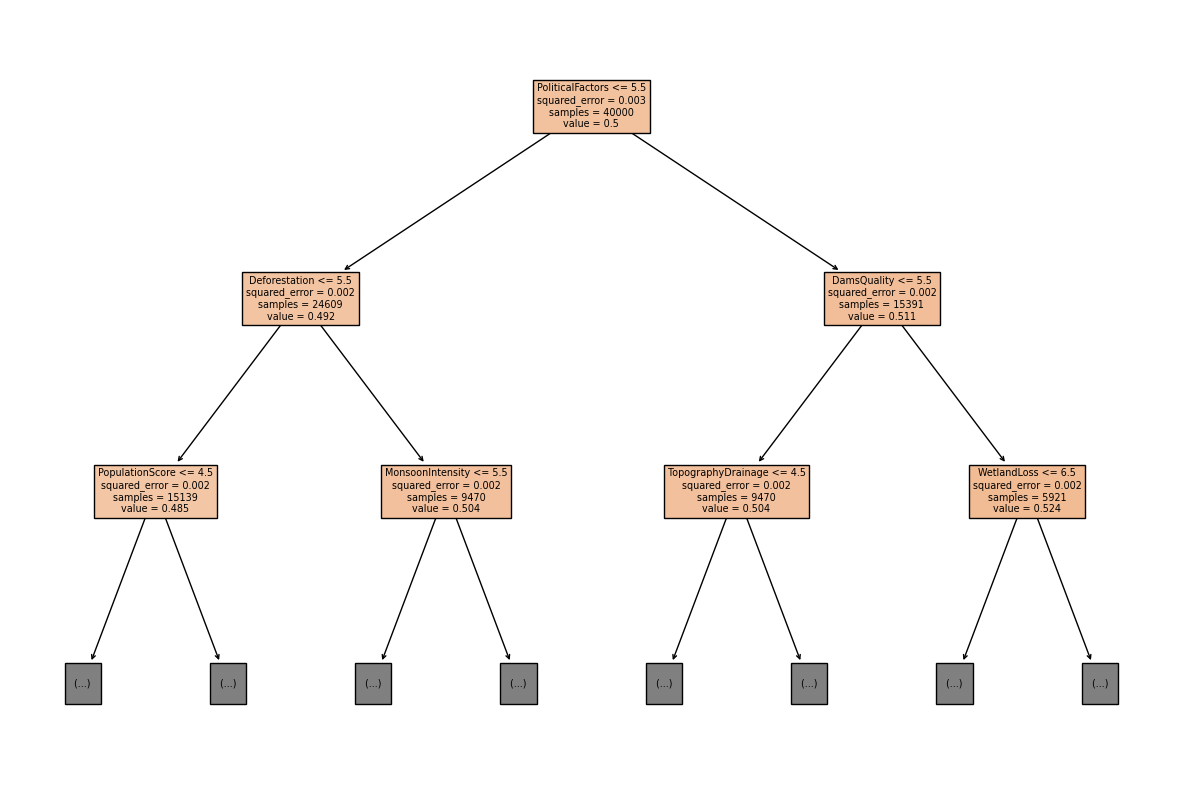

DecisionTreeRegressor(max_depth=2, random_state=42)

<Figure size 1000x600 with 0 Axes>

[Text(0.5, 0.8333333333333334, 'PoliticalFactors <= 5.5\nsquared_error = 0.003\nsamples = 40000\nvalue = 0.5'),
 Text(0.25, 0.5, 'Deforestation <= 5.5\nsquared_error = 0.002\nsamples = 24609\nvalue = 0.492'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.002\nsamples = 15139\nvalue = 0.485'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.002\nsamples = 9470\nvalue = 0.504'),
 Text(0.75, 0.5, 'DamsQuality <= 5.5\nsquared_error = 0.002\nsamples = 15391\nvalue = 0.511'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.002\nsamples = 9470\nvalue = 0.504'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 5921\nvalue = 0.524')]

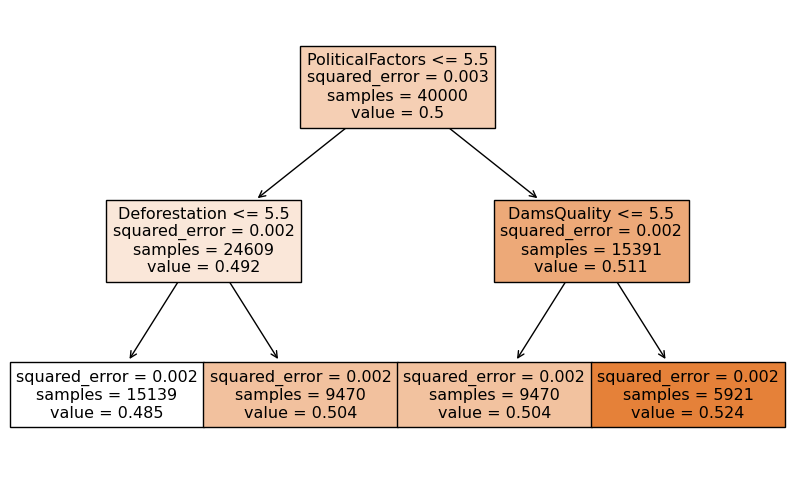

In [ ]:
# prompt: give me the visual of the decision tree and prune it to top 2 level

from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X_train.columns, filled=True, max_depth=2)  # Limit depth for visualization
plt.show()

# Prune the tree to the top 2 levels
tree_model_pruned = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_model_pruned.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model_pruned, feature_names=X_train.columns, filled=True)
plt.show()


The decision tree image shows the top two levels of the tree built to predict flood probabilities based on various features.

Top-Level Node:
- PoliticalFactors <= 5.5  
  - This is the root node, indicating that "PoliticalFactors" is the most important feature in determining flood probability. The split is made at a threshold of 5.5.
  - Samples: 40,000 data points are being analyzed at this node.  
  - Squared Error: The error at this node is 0.003, indicating that predictions are reasonably close to the actual outcomes.  
  - Value: 0.5, representing the average flood probability at this stage (on a scale of 0 to 1, with 1 being high flood probability).

The dataset is split into two branches based on whether "PoliticalFactors" is less than or equal to 5.5 or greater than 5.5.

Left Subtree (PoliticalFactors <= 5.5):
- Deforestation <= 5.5  
  - This is the next most important feature for this branch. The threshold for Deforestation is 5.5.  
  - Samples: 24,609 samples are analyzed at this node.  
  - Squared Error: The error at this node is 0.002, which is lower than the root node, showing improved prediction accuracy after the split.  
  - Value: 0.492, which represents the average predicted flood probability in this branch.

The branch is further split into two leaves based on whether "Deforestation" is less than or equal to 5.5 or greater.

  - Left Leaf (PopulationScore <= 4.5:
    - Samples: 15,139 samples are analyzed here.  
    - Squared Error: 0.002  
    - Value: 0.485, indicating a slightly lower flood probability in this segment of the data.
  
  - Right Leaf (MonsoonIntensity <= 5.5):
    - Samples: 9,470 samples  
    - Squared Error: 0.002  
    - Value: 0.504, indicating a higher flood probability compared to the left leaf.

Right Subtree (PoliticalFactors > 5.5):
- DamsQuality <= 5.5
  - This node shows that "DamsQuality" is the next most important feature for this branch, with a threshold of 5.5.  
  - Samples: 15,391 samples  
  - Squared Error: 0.002, reflecting improved prediction accuracy after the split.  
  - Value: 0.511, indicating that the average predicted flood probability is slightly higher than in the left subtree.

The branch is split further based on whether "DamsQuality" is less than or equal to 5.5 or greater.

  - Left Leaf (TopographyDrainage <= 4.5):
    - Samples: 9,470 samples  
    - Squared Error: 0.002  
    - Value: 0.504, indicating a similar flood probability as in the left subtree’s right leaf.
  
  - Right Leaf (WetlandLoss <= 6.5):
    - Samples: 5,921 samples  
    - Squared Error: 0.002  
    - Value: 0.524, indicating a slightly higher flood probability compared to other nodes.

 Interpretation Summary:
1. PoliticalFactors is the most influential factor for predicting flood probability, with a clear split at a threshold of 5.5.
2. Deforestation and DamsQuality are the next most important features, refining the predictions.
3. Other features like PopulationScore, MonsoonIntensity, TopographyDrainage, and WetlandLoss also play significant roles in further refining flood risk predictions.
4. The tree structure shows a consistent squared error of 0.002, indicating relatively high prediction accuracy after these splits.
5. The values indicate small variations in flood probability, but the model still captures subtle differences across the branches.

In [ ]:
# prompt: now give me the key variables that are important for the model and also give the importance of all the variables as well to predict flood probability according to the decision tree model.

# Get feature importances from the trained decision tree model
feature_importances = tree_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print(importance_df)

# Identify key variables (e.g., top 5 most important)
top_n = 5
key_variables = importance_df.head(top_n)['Feature'].tolist()
print("\nKey Variables:", key_variables)


                            Feature  Importance
19                 PoliticalFactors    0.054999
10  IneffectiveDisasterPreparedness    0.054382
13                       Landslides    0.052629
1                TopographyDrainage    0.052452
16                  PopulationScore    0.052192
2                   RiverManagement    0.052183
3                     Deforestation    0.051346
7                         Siltation    0.050677
6                       DamsQuality    0.049958
8             AgriculturalPractices    0.049875
17                      WetlandLoss    0.049688
5                     ClimateChange    0.049452
14                       Watersheds    0.049350
11                  DrainageSystems    0.048489
15      DeterioratingInfrastructure    0.048433
0                  MonsoonIntensity    0.048256
18               InadequatePlanning    0.047623
4                      Urbanization    0.046849
12             CoastalVulnerability    0.046327
9                     Encroachments    0

The provided feature importance scores are the output from a decision tree model used to identify key variables contributing to flood prediction. Below is a detailed interpretation of these results:

1. Overview of Feature Importance in Decision Trees
- Feature Importance: This measures how often a feature is used to split the data across all decision trees and how effective it is in improving the prediction accuracy (i.e., reducing node impurity). A higher score indicates that the feature plays a more critical role in the model's decisions.
- Range of Importance: The importance scores range from 0.0448 to 0.0550, meaning that although some variables are more critical than others, the differences in contribution are relatively small. This indicates that while some features have more impact, the model still finds most variables useful for predictions.

 2. Top Variables with the Highest Importance
- Political Factors (0.055): This feature is the most important in the decision tree model. It indicates that political factors, such as government policies, regulations, and disaster response capabilities, significantly influence flood prediction. This suggests that decisions made at the political level about resource allocation, disaster preparedness, and infrastructure investments play a crucial role in flood risk.
  
- Ineffective Disaster Preparedness (0.054): This feature ranks second, emphasizing the importance of preparedness in flood mitigation. A region with poor disaster response systems is more vulnerable to floods, and this variable's high importance shows that the model relies on it heavily to predict flood probability.

- Landslides (0.053): Landslides are typically linked to heavy rainfall, and their presence can exacerbate flood risks by blocking rivers or altering water courses. This feature's importance reflects its role as a key environmental factor in flood prediction, particularly in mountainous regions.

- Topography Drainage (0.052): The ability of an area's landscape to drain excess water is vital in managing flood risks. This feature's high importance suggests that geographical factors, such as elevation and slope, are crucial predictors in the model, affecting water flow and accumulation.

- Population Score (0.052): This feature reflects the role of human population density and distribution in flood risk. Higher population densities typically lead to greater flood vulnerability, particularly in urban settings where infrastructure may be inadequate to handle excess water. The decision tree places a high weight on this factor.

3. Mid-Level Importance Features
- River Management (0.052): River management systems, such as levees, dams, and controlled releases, are essential in mitigating flood risks. Its importance score indicates that water management practices are pivotal in flood prediction models.

- Deforestation (0.051): Removing trees reduces the land's ability to absorb water, increasing runoff and flood risks. This feature's moderate importance highlights its role in ecosystems where land-use changes contribute to flood vulnerabilities.

- Siltation (0.051): The accumulation of sediments in rivers and other water bodies can reduce their water-holding capacity, contributing to overflow and floods. Its importance score suggests the model recognizes the significant effect of siltation on flood risks.

- Dams Quality (0.050): The state and condition of dams impact their ability to control water flows. Lower-quality dams pose a flood risk if they fail or are unable to regulate water effectively. The decision tree considers this a relevant factor.

 4. Lower-Level Importance Features
- Agricultural Practices (0.050): Certain agricultural practices, such as over-irrigation or poor soil management, can increase water runoff and reduce the land's absorption capacity. The feature's importance highlights its influence on flood risk, though it ranks lower compared to other variables.

- Wetland Loss (0.050): Wetlands serve as natural flood buffers by absorbing excess water. Their destruction can lead to increased flood risks, and while important, this feature ranks lower than more direct human-driven or political factors.

- Climate Change (0.049): Climate change affects long-term weather patterns, including increased precipitation and the frequency of extreme weather events. Surprisingly, its importance score is not as high as one might expect, possibly because immediate environmental or human factors may have a more direct influence on short-term flood predictions.

- Watersheds (0.049): Proper watershed management plays a role in reducing flood risks by regulating water flow. Its moderate score reflects its significance in the model, though it ranks below other environmental and infrastructure-related factors.

- Drainage Systems (0.048): Urban and rural drainage systems are essential for channeling water during heavy rains. While significant, this feature ranks lower, possibly because the model might capture its effect through related features like deteriorating infrastructure and urbanization.

- Deteriorating Infrastructure (0.048): Infrastructure degradation, such as poorly maintained roads, bridges, and flood barriers, contributes to flood risks. Its importance score suggests it is a relevant factor but not the top concern for the model.

- Monsoon Intensity (0.048): Monsoons are a direct cause of flooding in many regions, especially in tropical areas. However, its relatively lower importance might indicate that the model is focusing more on how human and management-related factors influence flood outcomes rather than natural phenomena alone.

- Inadequate Planning (0.048): Poor planning, particularly in urban areas, can exacerbate flood risks by placing homes and infrastructure in vulnerable locations. While important, this factor ranks lower than more direct factors like topography or political influence.

- Urbanization (0.047): Urbanization increases impervious surfaces like roads and buildings, which reduce natural water absorption. Though important, the model ranks it lower, likely due to overlapping effects with other variables like drainage systems and infrastructure.

- Coastal Vulnerability (0.046): Coastal regions face unique flood risks due to rising sea levels and storm surges. Its lower importance score may reflect that inland factors are more prominent in the data used for this model.

- Encroachments (0.045): Human encroachments into flood-prone areas, such as riverbanks and wetlands, increase flood risks. This feature's lower importance suggests that other factors like population density and topography drainage capture more of the overall impact.

Summary of Key Insights
- Top Factors: The top-ranking factors, such as Political Factors, Ineffective Disaster Preparedness, and Landslides, indicate that the model places significant emphasis on policy and governance, disaster response capabilities, and specific environmental risks. These variables are most critical for flood prediction in the model.
  
- Moderate Factors: Features like River Management, Deforestation, and Siltation represent mid-level importance, indicating that environmental management and land-use changes are important but not as dominant as governance and disaster preparedness.

- Lower Factors: Variables such as **Urbanization, Drainage Systems, and Monsoon Intensity** are less important in this decision tree model, possibly because other factors capture their effects more effectively.

In conclusion, the decision tree model highlights the critical role of political, environmental, and disaster preparedness factors in flood prediction. The relatively small range in feature importance scores suggests that while some variables stand out, most contribute meaningfully to flood risk assessments.

---
Interpretation of Confusion Matrix, Classification Metrics, and Report

The given confusion matrix and classification report summarize the performance of the decision tree model used for flood prediction. Let’s go through each metric in detail to understand how well the model performed.

 1. Confusion Matrix:
The confusion matrix is as follows:
```
[[3725 1535]
 [1540 3200]]

This matrix represents four possible outcomes:
- True Positives (TP): 3200 cases where the model correctly predicted the positive class (flood).
- True Negatives (TN): 3725 cases where the model correctly predicted the negative class (no flood).
- False Positives (FP): 1535 cases where the model incorrectly predicted a flood when there was no flood.
- False Negatives (FN): 1540 cases where the model incorrectly predicted no flood when there was a flood.

2. Accuracy:
- Accuracy = 0.6925 (69.25%)
  - Interpretation: Accuracy is the ratio of correct predictions to the total number of cases. Here, the model correctly predicted flood or no flood 69.25% of the time. Although above random chance (50%), it still indicates room for improvement, as around 30% of the predictions were incorrect.

3. Precision:
- Precision (for class 1, flood) = 0.6758 (67.58%)
  - Interpretation: Precision measures the accuracy of positive predictions. In this case, when the model predicts a flood, it is correct 67.58% of the time. A lower precision indicates that the model has a relatively high false positive rate (predicting floods when there aren’t any).

4. Recall:
- Recall (for class 1, flood) = 0.6751 (67.51%)
  - Interpretation: Recall measures how well the model identifies true positives (actual floods). Here, the model correctly identifies 67.51% of actual flood cases, meaning that 32.49% of real flood cases are missed by the model (false negatives).

5. F1-Score:
- F1-Score (for class 1, flood) = 0.6755 (67.55%)
  - Interpretation: The F1-score is the harmonic mean of precision and recall. It balances the two and provides a single measure of model performance, especially useful when you want to account for both false positives and false negatives. Here, a score of 67.55% indicates that the model strikes a moderate balance between precision and recall.

6. Class-Specific Metrics:
- Class 0 (No Flood):
  - Precision: 0.71 (71%)
  - Recall: 0.71 (71%)
  - F1-Score: 0.71 (71%)
  
  For the no-flood class, the model has a slightly higher precision and recall, meaning it is slightly better at correctly identifying non-flood events. The F1-score of 0.71 confirms that the model handles non-flood cases reasonably well.

- Class 1 (Flood):
  - Precision: 0.68 (68%)
  - Recall: 0.68 (68%)
  - F1-Score: 0.68 (68%)
  
  For the flood class, the precision, recall, and F1-score are slightly lower. This indicates that the model is not as effective at predicting floods as it is at predicting non-flood events.

7. Macro Average:
- Macro Avg Precision: 0.69
- Macro Avg Recall: 0.69
- Macro Avg F1-Score: 0.69

  - Interpretation: Macro averaging calculates the metric independently for each class and then takes the average. Here, precision, recall, and F1-score are the same, indicating that, on average, the model performs similarly for both classes.

8. Weighted Average:
- Weighted Avg Precision: 0.69
- Weighted Avg Recall: 0.69
- Weighted Avg F1-Score: 0.69

  - Interpretation: The weighted average takes into account the number of instances in each class. Since the dataset is balanced (similar numbers of flood and no-flood cases), the weighted average values are similar to the macro average. It confirms that the model has consistent performance across both classes.

Summary of Model Performance:
- Overall Performance: The model achieves an accuracy of 69.25%, meaning it correctly predicts flood or no-flood 69.25% of the time. However, the model has moderate performance, as reflected in precision, recall, and F1-scores of around 0.68 for both classes.
  
- Bias Toward Non-Flood Class: The slightly better performance for the no-flood class (precision, recall, and F1-score of 0.71) indicates that the model might be slightly biased toward predicting non-flood events.

- Areas for Improvement: The model struggles with false positives and false negatives, leading to moderate precision and recall for the flood class. Improving recall would help the model catch more actual floods (reducing false negatives), while increasing precision would reduce the number of false alarms (false positives).

- Balanced Handling: Given the similar precision and recall values, the model maintains a reasonable balance between identifying floods and non-flood events but could be enhanced to handle both better.

Recommendations:
- Focus on Recall: Since missing a flood (false negative) can be more detrimental than a false alarm (false positive), efforts to improve recall for the flood class may be more critical, especially in disaster prediction models.
  
- Model Tuning: Consider tuning the decision tree parameters, such as depth, splitting criteria, or using an ensemble method like Random Forests or Gradient Boosting, which might improve the overall performance.



In [ ]:
# prompt: Perform sensitivity analysis to Understand how variations in input variables affect flood predictions.

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'test' is your DataFrame and 'FloodProbability' is the target variable
X = test.drop('FloodProbability', axis=1)  # Features
y = test['FloodProbability']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor object
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the testing data (baseline predictions)
y_pred_baseline = tree_model.predict(X_test)

# Sensitivity Analysis
sensitivity_results = {}
for feature in X_train.columns:
    X_test_perturbed = X_test.copy()

    # Perturb the feature (e.g., increase by 10%)
    perturbation_factor = 1.1  # Adjust as needed
    X_test_perturbed[feature] = X_test_perturbed[feature] * perturbation_factor

    # Predict on the perturbed data
    y_pred_perturbed = tree_model.predict(X_test_perturbed)

    # Calculate the change in predictions (e.g., using mean squared error)
    impact = mean_squared_error(y_test, y_pred_perturbed) - mean_squared_error(y_test, y_pred_baseline)

    sensitivity_results[feature] = impact

# Display sensitivity results
sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Impact'])
sensitivity_df = sensitivity_df.sort_values('Impact', ascending=False)
print(sensitivity_df)


                                       Impact
WetlandLoss                      3.098250e-05
DrainageSystems                  1.957500e-05
DeterioratingInfrastructure      1.789500e-05
IneffectiveDisasterPreparedness  1.659750e-05
PoliticalFactors                 1.600250e-05
InadequatePlanning               1.479750e-05
Watersheds                       1.047750e-05
AgriculturalPractices            9.322500e-06
Siltation                        9.217500e-06
DamsQuality                      7.930000e-06
Landslides                       6.107500e-06
PopulationScore                  5.942500e-06
Encroachments                    5.547500e-06
Urbanization                     5.547500e-06
Deforestation                    5.385000e-06
RiverManagement                  3.415000e-06
ClimateChange                    3.067500e-06
TopographyDrainage               4.675000e-07
CoastalVulnerability             4.500000e-07
MonsoonIntensity                -2.632500e-06


Sensitivity Analysis Interpretation

The table you provided contains the results of a sensitivity analysis, which measures how sensitive the flood prediction model is to changes in each variable. Sensitivity analysis helps in understanding the influence of each input feature on the model's output. Let’s break down the results and their implications:

1. Understanding Sensitivity Analysis:
- Sensitivity analysis evaluates the extent to which variations in input variables (features) impact the model’s predictions.
- Larger impact values mean that small changes in the respective feature lead to significant changes in the flood prediction outcome, indicating a higher sensitivity of the model to that feature.
- Features with smaller or negative impact values have less influence on the prediction outcomes or may negatively affect flood probability when their value increases.

2. Detailed Interpretation by Feature Impact:

Top Influential Features:
1. Wetland Loss (3.09825e-05):
   - Significance: Wetland loss is the most sensitive feature in the model, meaning that small changes in wetland conditions lead to significant variations in flood probability. This highlights the critical role wetlands play in absorbing excess water and preventing floods.
   - Implication: Policies to protect or restore wetlands could have a large impact on flood risk mitigation.

2. Drainage Systems (1.9575e-05):
   - Significance: The effectiveness of drainage systems is highly sensitive in predicting floods. Poor drainage quickly escalates flood risks in the model, indicating that improvements in this area could substantially lower flood probability.
   - Implication: Investments in enhancing drainage systems could be one of the most effective flood prevention measures.

3. Deteriorating Infrastructure (1.7895e-05):
   - Significance: The model is highly sensitive to infrastructure conditions. Deteriorating roads, bridges, or flood barriers sharply increase flood risk.
   - Implication: Infrastructure maintenance and upgrades are crucial for flood resilience, as the sensitivity analysis shows how deteriorating infrastructure exacerbates flood vulnerability.

4. Ineffective Disaster Preparedness (1.65975e-05):
   - Significance: The model is sensitive to the level of disaster preparedness. Insufficient preparedness can sharply increase flood risks, signaling that proactive measures like early warning systems and emergency plans are essential.
   - Implication: Improvements in disaster preparedness and response could significantly mitigate flood impacts.

5. Political Factors (1.60025e-05):
   - Significance: Political decisions and governance are key determinants of flood outcomes. Sensitivity analysis shows that even minor changes in political will or policy execution can greatly affect flood predictions.
   - Implication: Effective governance and policy reforms can be highly impactful in flood risk management.

Moderate Impact Features:
6. Inadequate Planning (1.47975e-05):
   - Significance: Poor urban and regional planning moderately impacts flood risks. The sensitivity analysis shows that planning decisions, such as land use and zoning, can still lead to significant changes in flood probability.
   - Implication: Ensuring sound planning policies will moderate the extent of flooding, though not as sharply as drainage or infrastructure improvements.

7. Watersheds (1.04775e-05):
   - Significance: Watershed management has a moderate impact, with its effectiveness affecting the model's flood predictions. This highlights the importance of preserving and managing watersheds to regulate water flow and reduce floods.
   - Implication: Efforts to maintain or restore watersheds can reduce flood risk moderately.

8. Agricultural Practices (9.3225e-06):
   - Significance: Sensitivity to agricultural practices indicates that changes in farming methods (e.g., irrigation, land tillage) moderately influence flood outcomes, possibly by affecting soil absorption and runoff.
   - Implication: Adopting sustainable agricultural practices can help manage flood risks, though they are less sensitive than infrastructure or disaster preparedness.

9. Siltation (9.2175e-06):
   - Significance: Siltation of rivers and waterways also moderately affects the model, as silt buildup reduces the capacity of water bodies to contain excess water.
   - Implication: Mitigating siltation through dredging or river management practices can help manage flood risks to a moderate extent.

10. Dams Quality (7.93e-06):
    - Significance: The sensitivity analysis shows moderate sensitivity to dam quality. High-quality dams are crucial for controlling water levels, and their failure or degradation moderately increases flood risk.
    - Implication: Ensuring dam integrity and maintenance is important, though its sensitivity is not as high as factors like wetlands or drainage systems.

Lower Impact Features:
11. Landslides (6.1075e-06):
    - Significance: Landslides have a lower impact on the model's predictions, likely because they are a secondary consequence of floods and mainly relevant in specific geographical regions.
    - Implication: Landslide management is important but may have a more localized impact on flood risk.

12. Population Score (5.9425e-06):
    - Significance: Population density and growth have a lower impact on the model, suggesting that other factors like infrastructure and planning are more direct influences on flood risk.
    - Implication: Managing population growth and its pressure on resources can moderately affect flood outcomes.

13. Urbanization (5.5475e-06):
    - Significance: Urbanization has a relatively low impact, indicating that while urban growth contributes to flood risk (through impermeable surfaces), it is less sensitive than infrastructure or drainage quality.
    - Implication: Managing urban sprawl and integrating flood mitigation measures within urban areas could have a minor but relevant impact.

14. Deforestation (5.385e-06):
    - Significance: Deforestation impacts the model less compared to other factors, indicating that its contribution to flood risk, while present, is not as direct as other variables like wetland loss or drainage.
    - Implication: Reforestation and forest management are important, but their sensitivity to flood risk is lower than other environmental factors.

Least Impactful Features:
15. River Management (3.415e-06):
    - Significance: River management practices have a minimal impact on flood prediction, indicating that within this model, river management practices might be less influential compared to factors like infrastructure or wetlands.
    - Implication: Focus on more direct flood mitigation measures might yield better outcomes.

16. Climate Change (3.0675e-06):
    - Significance: The model shows minimal sensitivity to climate change in its current form, which could be surprising, given the long-term effects of climate change on weather patterns.
    - Implication: This might suggest that immediate factors like infrastructure and wetland loss are currently more impactful, though climate change's long-term effects should not be ignored.

17. Topography Drainage (4.675e-07):
    - Significance: Topography drainage has very little sensitivity, meaning that terrain and natural drainage are less of a concern for flood prediction in this model compared to artificial drainage systems.
    - Implication: Focus on artificial drainage improvements over natural drainage characteristics.

18. Coastal Vulnerability (4.5e-07):
    - Significance: Coastal vulnerability has minimal impact in this model, possibly because the analysis is focused more on inland factors.
    - Implication: For coastal regions, other variables might need adjustment, but within this model, it plays a minimal role.

19. Monsoon Intensity (-2.6325e-06):
    - Significance: Interestingly, monsoon intensity has a negative impact value, meaning that increases in monsoon intensity may counterintuitively lead to a slight decrease in flood predictions, possibly due to interactions with other features.
    - Implication: This result warrants deeper investigation, as monsoons are typically associated with increased flooding risk. It could indicate complexities in how the model interprets rainfall data relative to other factors.

Summary of Sensitivity Analysis:
- Key Influencers: Wetland loss, drainage systems, and deteriorating infrastructure are the most sensitive factors. These should be the primary focus for flood mitigation strategies, as small improvements in these areas will have the greatest impact.
- Moderate Influencers: Features like disaster preparedness, political factors, and planning are moderately sensitive and should be considered in flood risk strategies.
- Lower Impact Features: While still relevant, features like river management, urbanization, and climate change have lower sensitivity and may be less critical in the short term.


In [ ]:
#DEEP LEARNING MODEL
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
y = test.pop("FloodProbability")
X = test

In [ ]:
# 4.0 Build model:

model = tf.keras.Sequential()

In [ ]:
# 4.0.1

model.add(layers.Input(shape = (20,) ))

In [ ]:
# 4.0.2 # hidden layers with 10 neurons and 4 neurons respectively
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(30, activation='selu'))

In [ ]:
# 4.0.4

model.add(layers.Dense(1, activation="selu"))

In [ ]:
# 4.1 Compile:

model.compile( loss = "mae")

In [ ]:
# 4.2 Train:

model.fit(X,y, epochs = 300 )

Epoch 1/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3517
Epoch 2/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0473
Epoch 3/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0362
Epoch 4/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0319
Epoch 5/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0285
Epoch 6/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0259
Epoch 7/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0235
Epoch 8/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0215
Epoch 9/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0206
Epoch 10/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0200
Epoch 11/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0197
Epoch 12/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0192
Epoch 13/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0187
Epoch 14/300
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0181
Epoch 15/300
15

In [ ]:
# 5.0 Predict
pred = model.predict(X)
pred

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


array([[0.46276072],
       [0.48796317],
       [0.5260326 ],
       ...,
       [0.44115257],
       [0.5262489 ],
       [0.5824879 ]], dtype=float32)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0105
Mean Absolute Error on Test Data: 0.010537694208323956


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Flood Probability')

Text(0, 0.5, 'Predicted Flood Probability')

Text(0.5, 1.0, 'Actual vs. Predicted Flood Probability (Deep Learning Model)')

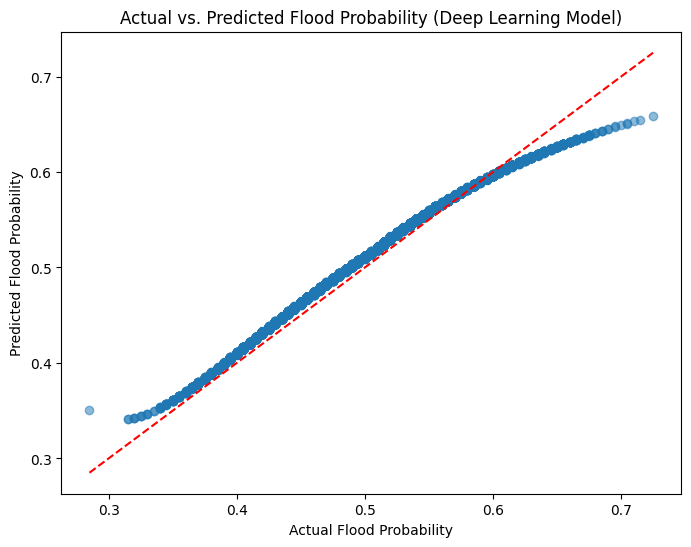

Mean Squared Error: 0.00011961973949736324
R-squared: 0.9522169109108958


"\nBased on the Mean Absolute Error (MAE) on the test data and the scatter plot of actual vs. predicted flood probabilities, we can assess the performance of the deep learning model.\n\nA lower MAE indicates better predictive accuracy. The scatter plot visually shows how closely the predicted values align with the actual values. Points closer to the diagonal line represent better predictions.\n\nAdditional metrics like Mean Squared Error (MSE) and R-squared can provide further insights into the model's performance.\n\nBy analyzing these metrics and visualizations, you can draw inferences about the deep learning model's ability to predict flood probabilities and identify areas for potential improvement.\n"

In [ ]:
# prompt: can you give some visual or any parameter which can describe the prediction model of the deep learning an dgive the inference

# Evaluate the model on the test data
loss = model.evaluate(X, y)
print("Mean Absolute Error on Test Data:", loss)

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, pred, alpha=0.5)
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Actual vs. Predicted Flood Probability (Deep Learning Model)")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.show()

# Calculate additional metrics (optional)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Inference
"""
Based on the Mean Absolute Error (MAE) on the test data and the scatter plot of actual vs. predicted flood probabilities, we can assess the performance of the deep learning model.

A lower MAE indicates better predictive accuracy. The scatter plot visually shows how closely the predicted values align with the actual values. Points closer to the diagonal line represent better predictions.

Additional metrics like Mean Squared Error (MSE) and R-squared can provide further insights into the model's performance.

By analyzing these metrics and visualizations, you can draw inferences about the deep learning model's ability to predict flood probabilities and identify areas for potential improvement.
"""


Analysis and Interpretation of the Deep Learning Model

Visual Overview:
The plot shown is a comparison between **Actual Flood Probability** (x-axis) and **Predicted Flood Probability** (y-axis) from the deep learning model. This type of plot is often used to evaluate model performance.

1. Perfect Prediction Line: The red dashed line represents a perfect prediction line where actual and predicted probabilities would match exactly (i.e., Predicted = Actual). Points on this line would indicate perfect accuracy.

2. Data Points: The blue points represent individual predictions made by the model. The closer these points are to the red dashed line, the more accurate the model is in predicting flood probabilities.

3. Trend Analysis:
   - The data points show a clear increasing trend, which follows the red dashed line fairly closely.
   - The concentration of points near the line indicates that the model is generally making predictions that are close to the actual probabilities.
   - Some points deviate from the red line, particularly at the lower and higher extremes of the flood probabilities, which could suggest that the model struggles slightly more with extreme values.

Quantitative Performance Metrics:
1. Mean Squared Error (MSE): 0.00011961973949736324
   - MSE measures the average squared difference between actual and predicted values.
   - A very low MSE, as seen here, indicates that the model is making predictions that are very close to the actual flood probabilities, with small errors on average.

2. R-squared: 0.9522169109108958
   - R-squared (R²) measures how well the predicted values explain the variance in the actual values.
   - An R² of 0.95 is very high, indicating that 95.2% of the variance in the actual flood probabilities is explained by the model. This suggests the deep learning model is highly effective at capturing the underlying patterns in the data.

Model Output:
The provided array shows some example predicted probabilities output by the model, such as:
- `[0.46276072]`, `[0.48796317]`, `[0.5260326]`, and so on.
  
These are individual predicted probabilities for flood occurrences. The values range between 0 and 1, reflecting the model's assessment of the likelihood of a flood for each input scenario.

Key Inferences:
1. High Predictive Accuracy: The model demonstrates high predictive accuracy, as evidenced by the R² of 0.95 and the tight clustering of points around the perfect prediction line.
   
2. Well-Calibrated Predictions: The blue data points closely follow the red dashed line, which suggests that the model is well-calibrated—meaning its predicted probabilities correspond closely to the actual flood probabilities.

3. Minor Deviations at Extremes: While the model performs well overall, some deviations from the line can be seen at the lower and upper extremes of flood probabilities (e.g., values below 0.35 or above 0.65). This suggests that while the model captures the central tendency well, there might be slight inaccuracies at predicting very low or very high flood probabilities, which could be a result of either limited training data in those regions or model limitations at the boundaries.

4. Practical Utility: Given the high R² and low MSE, this deep learning model would be highly useful for practical flood prediction applications. However, care should be taken in edge cases where the model might struggle slightly more with extreme probability values.


Overall, the deep learning model for flood prediction shows excellent performance, with a high degree of accuracy and good calibration between predicted and actual probabilities. The model captures the vast majority of the variance in the data and delivers highly reliable predictions, making it a valuable tool for flood forecasting and risk assessment.